In [17]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
#mu-sigma by sd.   standardize
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz


# 1.1.5
# Install as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
import graphviz

# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [18]:
# 1.3 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
#Read the data file
from google.colab import files
uploaded=files.upload()

Saving income_evaluation.csv to income_evaluation (1).csv


In [20]:
df=pd.read_csv("income_evaluation.csv")

In [21]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [26]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [27]:
type(df)

pandas.core.frame.DataFrame

In [28]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
df.size

488415

In [30]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [33]:
df['age']= label_encoder.fit_transform(df['age'])
df[' workclass']= label_encoder.fit_transform(df[' workclass'])
df[' fnlwgt']= label_encoder.fit_transform(df[' fnlwgt'])
df[' education']= label_encoder.fit_transform(df[' education'])
df[' marital-status']= label_encoder.fit_transform(df[' marital-status'])
df[' occupation']= label_encoder.fit_transform(df[' occupation'])
df[' relationship']= label_encoder.fit_transform(df[' relationship'])
df[' race']= label_encoder.fit_transform(df[' race'])
df[' sex']= label_encoder.fit_transform(df[' sex'])
df[' native-country']= label_encoder.fit_transform(df[' native-country'])
df[' income']= label_encoder.fit_transform(df[' income'])

In [34]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,9,13,4,1,1,4,1,2174,0,40,39,0
1,33,6,2926,9,13,2,4,0,4,1,0,0,13,39,0
2,21,4,14086,11,9,0,6,1,4,1,0,0,40,39,0
3,36,4,15336,1,7,2,6,0,2,1,0,0,40,39,0
4,11,4,19355,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,12,2,13,5,4,0,0,0,38,39,0
32557,23,4,8080,11,9,2,7,0,4,1,0,0,40,39,1
32558,41,4,7883,11,9,6,1,4,4,0,0,0,40,39,0
32559,5,4,12881,11,9,4,1,3,4,1,0,0,20,39,0


In [37]:
X=df[['age',' workclass',' fnlwgt',' education',' marital-status',' occupation',' relationship',' race',' sex',' capital-gain',' capital-loss',' hours-per-week',' native-country']]

In [43]:
df[' income'].corr

<bound method Series.corr of 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name:  income, Length: 32561, dtype: int64>

In [44]:
y=df[' income']

In [45]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [46]:
# 2.5 Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# 2.5.1 About train data:
                                   
X_train.shape  # (105,4)
print()

# 2.5.2 Test data:

X_test.shape   # (45,4)
print()

(22792, 13)

(9769, 13)

In [47]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [48]:
# 3.2 Train our decision tree:

ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
# 4.0 Make predictions of test data
y_te = ct.predict(X_test)

In [50]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size  # 0.93

0.8066332275565564

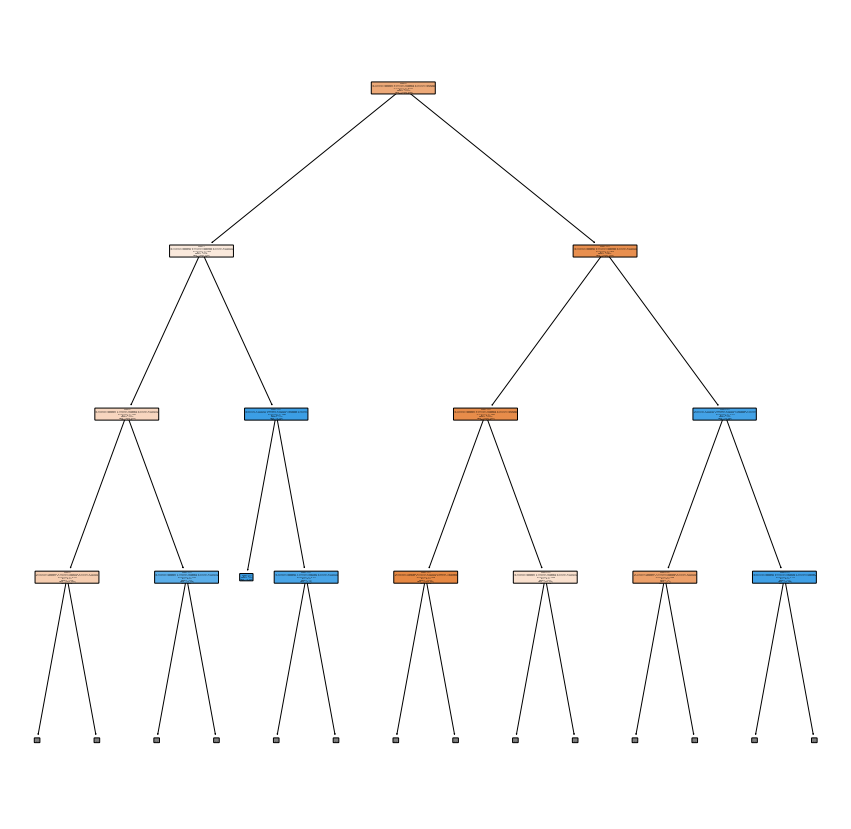

In [52]:
# 4.2 Plot decision tree
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(X),
            class_names = ["<=50k",">50K"]
            )

_=plt.show()

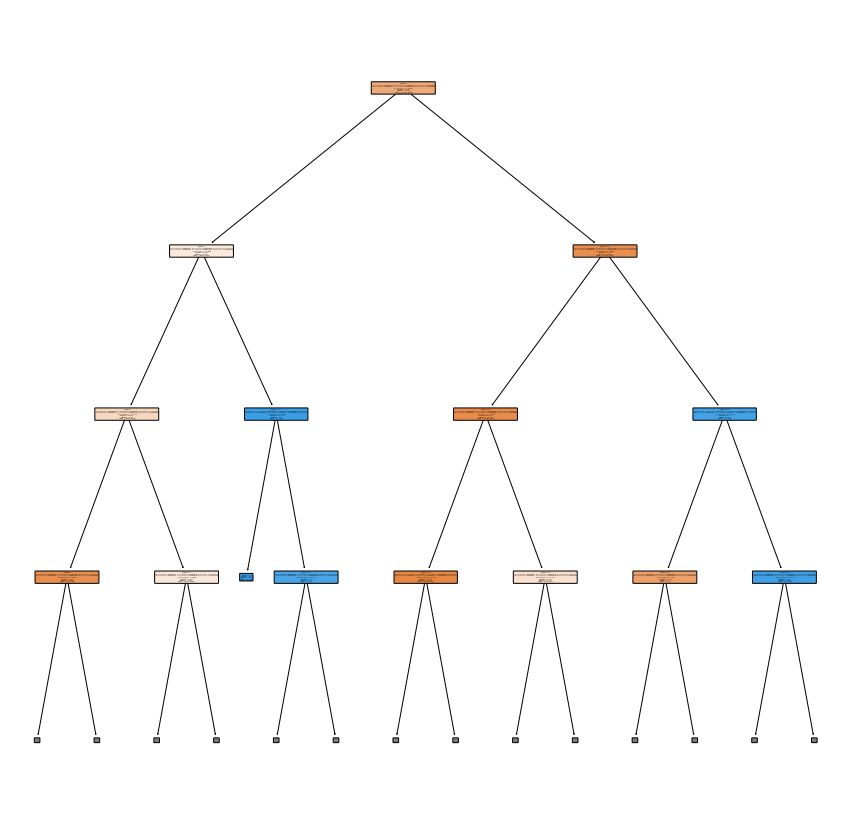

In [53]:
# 5.0 Plot decision tree with 'entropy' as criterion:

ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(X),
            class_names = ["<=50K",">50K"]
            )

_=plt.show()

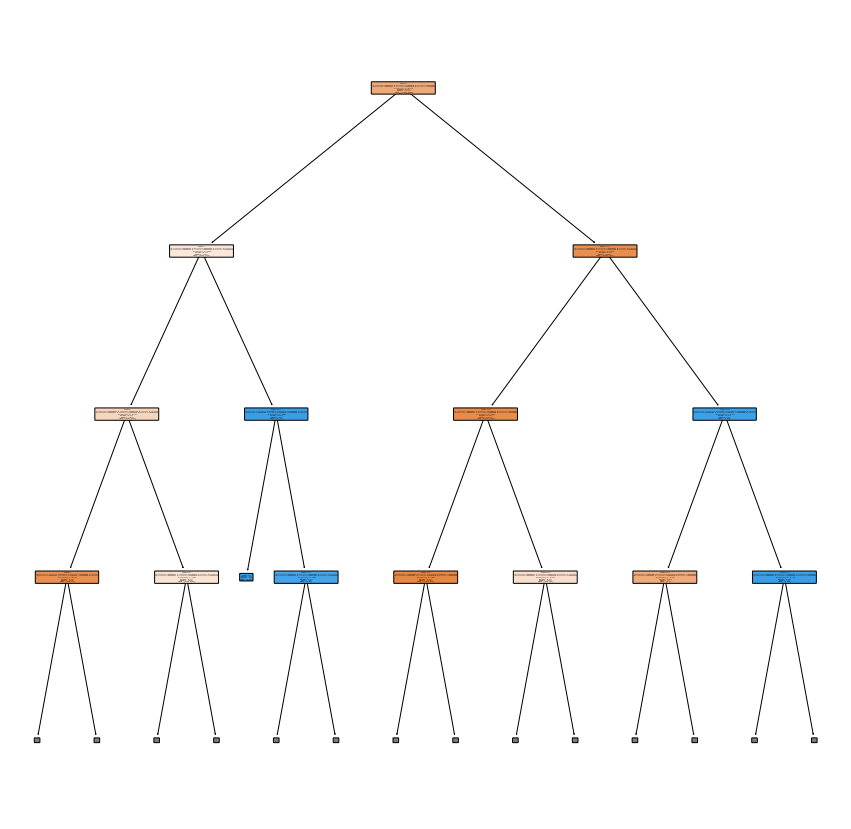

In [54]:
# 5.3 Remove just two rows and decision tree changes:


X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
_=ct1.fit(X_train[2:,:],y_train[2:])

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(X),
            class_names = ["<=50K",">50K"]
            )

_=plt.show()

In [55]:
# 5.4 Make predictions of test data
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size  

0.9460538437915856